# Exploring Airbnb Market Trends

Introduction

New York City, a global hub for tourism, boasts a vibrant and diverse Airbnb market. To meet the high demand for temporary lodging, numerous Airbnb listings offer a range of accommodations, from short-term stays to longer-term rentals. In this project, I delve into the New York Airbnb market.

This notebook analyzes the NYC Airbnb market using data from 2019. The goal is to explore the factors that influence listing prices.

The dataset used contains information on Airbnb listings, including prices, room types, location, and review data.  The primary dataset is the NYC Airbnb Open Data.

This analysis will primarily use Python and the Pandas library.  Libraries such as Matplotlib and Seaborn will be employed for data visualization.

Data Acquisition

The data for this analysis comes from three files:

airbnb_price.csv: Contains listing prices and locations.

airbnb_room_type.xlsx: Contains listing descriptions and room types.

airbnb_last_review.tsv: Contains host names and review dates.

The listing_id column is used to join these datasets.

In [1]:
import pandas as pd
# New path, assuming the file is now inside the 'data' directory:
df = pd.read_csv('data/merged_airbnb_data.csv') 
import matplotlib.pyplot as plt
import seaborn as sns

# 1. Load the datasets
price_df = pd.read_csv("/kaggle/input/exploring-airbnb-market-trends/airbnb_price.csv")
room_type_df = pd.read_excel("/kaggle/input/exploring-airbnb-market-trends/airbnb_room_type.xlsx")
review_df = pd.read_csv("/kaggle/input/exploring-airbnb-market-trends/airbnb_last_review.tsv", sep='\t')

# Display the first few rows of each DataFrame
print("Price Data:")
print(price_df.head())
print("\nRoom Type Data:")
print(room_type_df.head())
print("\nReview Data:")
print(review_df.head())


Price Data:
   listing_id        price                nbhood_full
0        2595  225 dollars         Manhattan, Midtown
1        3831   89 dollars     Brooklyn, Clinton Hill
2        5099  200 dollars     Manhattan, Murray Hill
3        5178   79 dollars  Manhattan, Hell's Kitchen
4        5238  150 dollars       Manhattan, Chinatown

Room Type Data:
   listing_id                                description        room_type
0        2595                      Skylit Midtown Castle  Entire home/apt
1        3831            Cozy Entire Floor of Brownstone  Entire home/apt
2        5099  Large Cozy 1 BR Apartment In Midtown East  Entire home/apt
3        5178            Large Furnished Room Near B'way     private room
4        5238         Cute & Cozy Lower East Side 1 bdrm  Entire home/apt

Review Data:
   listing_id    host_name   last_review
0        2595     Jennifer   May 21 2019
1        3831  LisaRoxanne  July 05 2019
2        5099        Chris  June 22 2019
3        5178     Shunich

Data Description and Cleaning

Before merging, let's standardize the column names by converting them to lowercase and removing leading/trailing whitespace.

In [2]:
# 2. Standardize column names
price_df.columns = price_df.columns.str.lower().str.strip()
room_type_df.columns = room_type_df.columns.str.lower().str.strip()
review_df.columns = review_df.columns.str.lower().str.strip()

print("\nPrice DF Columns:")
print(price_df.columns)
print("\nRoom Type DF Columns:")
print(room_type_df.columns)
print("\nReview DF Columns:")
print(review_df.columns)


Price DF Columns:
Index(['listing_id', 'price', 'nbhood_full'], dtype='object')

Room Type DF Columns:
Index(['listing_id', 'description', 'room_type'], dtype='object')

Review DF Columns:
Index(['listing_id', 'host_name', 'last_review'], dtype='object')


Now, we'll merge the DataFrames using the listing_id column with an outer join.

In [3]:
# 3. Merge the DataFrames
merged_df = pd.merge(price_df, review_df, on="listing_id", how="outer")
merged_df = pd.merge(merged_df, room_type_df, on="listing_id", how="outer")

print("\nMerged Data:")
print(merged_df.head())


Merged Data:
   listing_id        price                nbhood_full    host_name  \
0        2595  225 dollars         Manhattan, Midtown     Jennifer   
1        3831   89 dollars     Brooklyn, Clinton Hill  LisaRoxanne   
2        5099  200 dollars     Manhattan, Murray Hill        Chris   
3        5178   79 dollars  Manhattan, Hell's Kitchen     Shunichi   
4        5238  150 dollars       Manhattan, Chinatown          Ben   

    last_review                                description        room_type  
0   May 21 2019                      Skylit Midtown Castle  Entire home/apt  
1  July 05 2019            Cozy Entire Floor of Brownstone  Entire home/apt  
2  June 22 2019  Large Cozy 1 BR Apartment In Midtown East  Entire home/apt  
3  June 24 2019            Large Furnished Room Near B'way     private room  
4  June 09 2019         Cute & Cozy Lower East Side 1 bdrm  Entire home/apt  


Describe the columns in the merged dataframe:

listing_id: Unique identifier for each listing.

price: Nightly listing price in USD.

nbhood_full: Borough and neighborhood.

host_name: Name of the listing host.

last_review: Date when the listing was last reviewed.

description: Listing description.

room_type: Type of room.

Let's examine the merged data.

In [4]:
print(merged_df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25209 entries, 0 to 25208
Data columns (total 7 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   listing_id   25209 non-null  int64 
 1   price        25209 non-null  object
 2   nbhood_full  25209 non-null  object
 3   host_name    25201 non-null  object
 4   last_review  25209 non-null  object
 5   description  25199 non-null  object
 6   room_type    25209 non-null  object
dtypes: int64(1), object(6)
memory usage: 1.3+ MB
None


We can see the columns and their data types. We'll also check for missing values.
The output shows the number of missing values for each column. We'll handle missing prices in the analysis.

In [5]:
print(merged_df.isnull().sum())

listing_id      0
price           0
nbhood_full     0
host_name       8
last_review     0
description    10
room_type       0
dtype: int64


Exploratory Data Analysis (EDA)

Average Price per Room Type

First, we'll calculate the average price for each room type.

Average Price per Room Type:
         room_type       price
0  ENTIRE HOME/APT  199.578161
1  Entire home/apt  196.962402
2     PRIVATE ROOM   82.192287
3     Private room   81.887585
4      SHARED ROOM   54.608247
5      Shared room   52.900000
6  entire home/apt  195.875797
7     private room   80.374555
8      shared room   54.409091


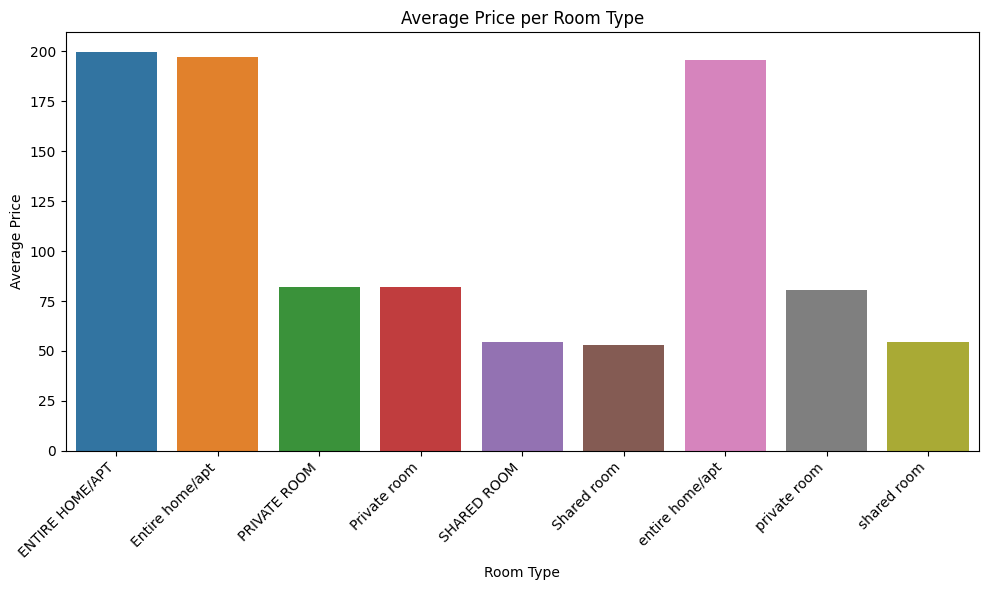

In [6]:
# Step 1: Remove 'dollars' and non-numeric characters from 'price' and convert to numeric
merged_df['price'] = merged_df['price'].astype(str).str.replace(' dollars', '', regex=False).str.replace('[^0-9.]', '', regex=True)
merged_df['price'] = pd.to_numeric(merged_df['price'], errors='coerce')

# Step 2: Remove rows where price is NA after cleaning
merged_df = merged_df.dropna(subset=['price'])

# Step 3: Analyze average price per room type
avg_price_by_room_type = merged_df.groupby('room_type')['price'].mean().reset_index()

# Step 4: Print the result
print("Average Price per Room Type:")
print(avg_price_by_room_type)

# Visualize
plt.figure(figsize=(10, 6))  # Adjust figure size for better readability
sns.barplot(x='room_type', y='price', data=avg_price_by_room_type)
plt.title('Average Price per Room Type')
plt.xlabel('Room Type')
plt.ylabel('Average Price')
plt.xticks(rotation=45, ha='right')  # Rotate x-axis labels
plt.tight_layout()  # Adjust layout to prevent labels from being cut off
plt.show()

Price Variation Across Boroughs and Neighborhoods

Next, we'll explore how prices vary across different boroughs and neighborhoods. We'll use the nbhood_full column, which contains both borough and neighborhood information. We'll split this column into two separate columns: borough and neighborhood.


Average Price per Borough:

         borough       price
0      Manhattan  184.000678
1       Brooklyn  121.904739
2         Queens   92.813947
3  Staten Island   86.044944
4          Bronx   79.127507


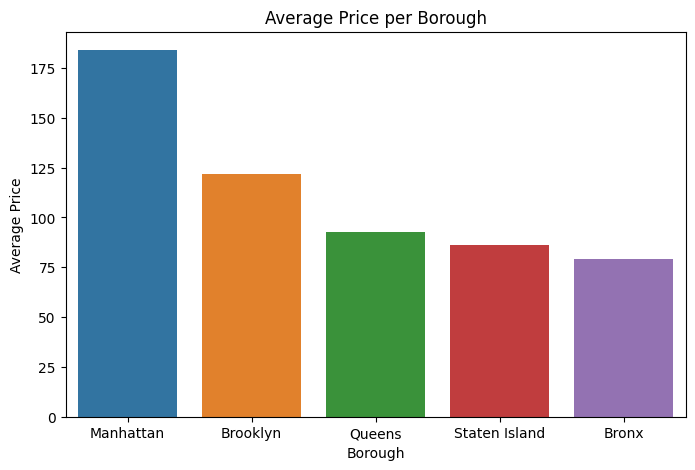


Top 10 Neighborhoods with Lowest Average Prices:

     neighborhood  price
0  New Dorp Beach  38.00
1      Mount Eden  42.50
2     Hunts Point  42.75
3     Little Neck  45.00
4     Bull's Head  48.00
5   Port Richmond  48.80
6       Olinville  53.00
7         Concord  53.30
8       Bronxdale  53.60
9       Soundview  54.70


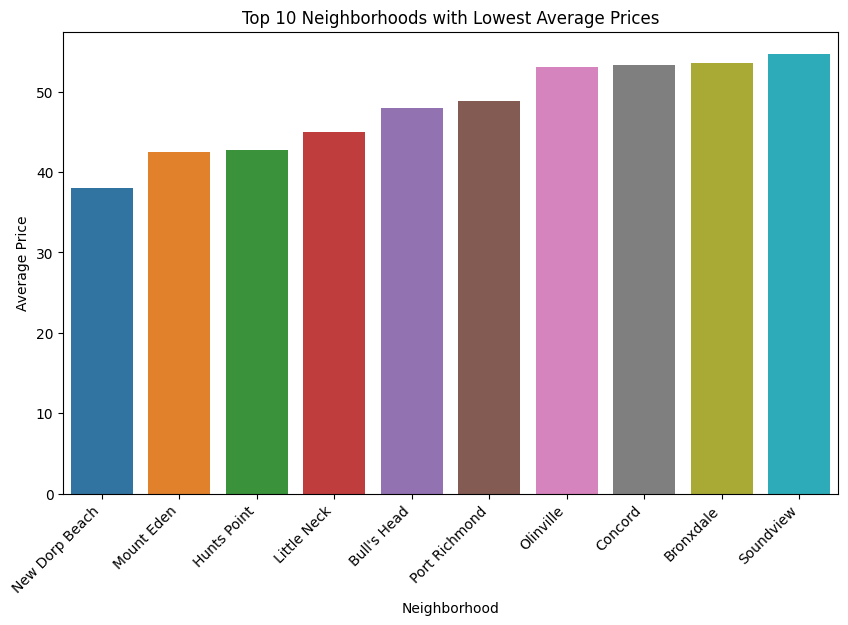

In [7]:
# Step 1: Split the 'nbhood_full' column into 'borough' and 'neighborhood'
merged_df[['borough', 'neighborhood']] = merged_df['nbhood_full'].str.split(',', expand=True, n=1) # added n=1
merged_df['borough'] = merged_df['borough'].str.strip()
merged_df['neighborhood'] = merged_df['neighborhood'].str.strip()

# Step 2: Calculate the average price per borough
avg_price_by_borough = merged_df.groupby('borough')['price'].mean().sort_values(ascending=False).reset_index()

# Step 3: Print the result
print("\nAverage Price per Borough:\n")
print(avg_price_by_borough)

# Visualize
plt.figure(figsize=(8, 5))
sns.barplot(x='borough', y='price', data=avg_price_by_borough)
plt.title('Average Price per Borough')
plt.xlabel('Borough')
plt.ylabel('Average Price')
plt.show()

# Step 4: Calculate the average price per neighborhood
avg_price_by_neighborhood = merged_df.groupby('neighborhood')['price'].mean().sort_values().reset_index()

# Step 5: Print the result
print("\nTop 10 Neighborhoods with Lowest Average Prices:\n")
print(avg_price_by_neighborhood.head(10))

# Visualize top 10 neighborhoods
plt.figure(figsize=(10, 6))
sns.barplot(x='neighborhood', y='price', data=avg_price_by_neighborhood.head(10))
plt.title('Top 10 Neighborhoods with Lowest Average Prices')
plt.xlabel('Neighborhood')
plt.ylabel('Average Price')
plt.xticks(rotation=45, ha='right')
plt.show()

Most Common Words in Listing Descriptions

Finally, to understand what attracts renters, we'll analyze the most frequent words in listing descriptions.

Include a note about removing stop words.


Top 20 words
[('private', 4092), ('bedroom', 3678), ('cozy', 2737), ('apt', 2230), ('brooklyn', 2162), ('manhattan', 2022), ('studio', 1967), ('2', 1863), ('spacious', 1726), ('1', 1634), ('park', 1520), ('east', 1357), ('sunny', 1293), ('near', 1277), ('beautiful', 1262), ('williamsburg', 1230), ('nyc', 1227), ('home', 1103), ('loft', 1050), ('village', 1043)]


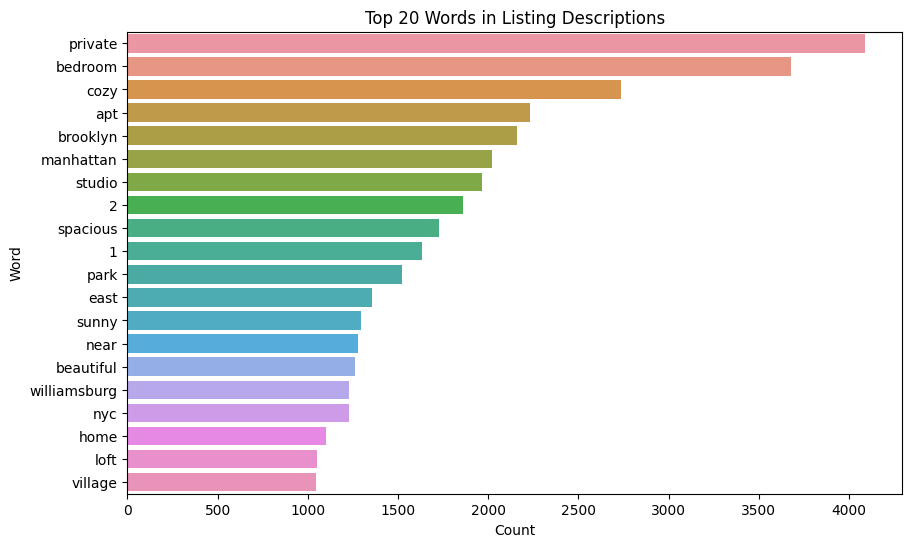

In [8]:
from collections import Counter
from nltk.corpus import stopwords
import string

# Step 2: Clean and tokenize the 'description' column
merged_df['description'] = merged_df['description'].astype(str).str.lower().str.split()

# Remove stop words and punctuation
stop_words = set(stopwords.words('english'))
custom_stopwords = ["apartment", "room", "airbnb", "stay", "available", "host", "place"]
all_stopwords = stop_words.union(custom_stopwords)

def remove_stopwords_and_punctuation(tokens):
    cleaned_tokens = []
    for token in tokens:
        token = token.translate(str.maketrans('', '', string.punctuation))
        if token not in all_stopwords and token:
            cleaned_tokens.append(token)
    return cleaned_tokens

merged_df['description'] = merged_df['description'].apply(remove_stopwords_and_punctuation)

# Step 3: Count the most common words
word_counts = Counter()
for desc in merged_df['description']:
    word_counts.update(desc)

# Get the top 20 words
top_words = word_counts.most_common(20)
print("\nTop 20 words")
print(top_words)

# Visualize the top 20 words
plt.figure(figsize=(10, 6))
words = pd.Series([word[0] for word in top_words]) # Convert to Pandas Series
counts = pd.Series([word[1] for word in top_words]) # Convert to Pandas Series
sns.barplot(x=counts, y=words)
plt.title('Top 20 Words in Listing Descriptions')
plt.xlabel('Count')
plt.ylabel('Word')
plt.show()

Insights and Conclusions

This analysis provides a glimpse into the New York City Airbnb market in 2019.

Key findings include:

Summarize the average price per room type.

Summarize the price variation across boroughs (e.g., Manhattan is the most expensive).

Summarize the most common words in listing descriptions (e.g., "clean," "location," "comfortable").

Factors that influence price: Location (borough and neighborhood) and room type are significant factors in determining Airbnb listing prices in NYC.

Insights: The data reveals that entire homes/apartments command the highest prices, and Manhattan is the most expensive borough.  Listing descriptions often emphasize cleanliness, location, and comfort.

Further analysis could explore other factors, such as host behavior, seasonality, and long-term trends.

This exploration of Airbnb market trends leverages the case study and dataset from DataCamp's "Project: Exploring Airbnb Market Trends" (https://www.datacamp.com/datalab/w/14ec9200-cb96-4481-b5b8-3bd363f65384/edit). Many thanks to DataCamp for offering such insightful projects that facilitate hands-on data analysis practice.

In [9]:
# Standardize room_type column casing
merged_df['room_type'] = merged_df['room_type'].str.title()

In [10]:
merged_df.to_csv("airbnb_tableau.csv", index=False)